In [170]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [171]:
df = pd.read_csv('merged_df.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment,PriceDiff,StockMovement,nextdayClose
0,2021-10-01,141.899994,142.919998,139.110001,142.649994,140.832993,94639600,-0.090909,1.135345,1,139.139999
1,2021-10-04,141.759995,142.210007,138.270004,139.139999,137.367722,98322000,-0.100000,-3.465271,0,141.110001
2,2021-10-05,139.490005,142.240005,139.360001,141.110001,139.312622,80861100,-0.200000,1.944901,1,142.000000
3,2021-10-06,139.470001,142.149994,138.369995,142.000000,140.191269,83221100,0.000000,0.878647,1,143.289993
4,2021-10-07,143.059998,144.220001,142.720001,143.289993,141.464844,61732700,0.125000,1.273575,1,142.899994
...,...,...,...,...,...,...,...,...,...,...,...
244,2022-09-21,157.339996,158.740005,153.600006,153.720001,152.612381,101696800,0.066667,-3.157104,0,152.740005
245,2022-09-22,152.380005,154.470001,150.910004,152.740005,151.639481,86652500,-0.166667,-0.972900,0,150.429993
246,2022-09-23,151.190002,151.470001,148.559998,150.429993,149.346100,96029900,0.000000,-2.293381,0,150.770004
247,2022-09-26,149.660004,153.770004,149.639999,150.770004,149.683655,93339400,0.000000,0.337555,1,151.759995


In [172]:
from sklearn.preprocessing import MinMaxScaler

xc = df[['Close']]
xs = df[['sentiment']]
y = df[['StockMovement']]

scaler = MinMaxScaler()
scaled_xc = scaler.fit_transform(xc)

scaler2 = MinMaxScaler()
scaled_xs = scaler2.fit_transform(xs)

In [173]:
# Function to create sequences for LSTM

seq_length = 5

def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        X.append(seq)
    return np.array(X)

In [174]:
x = create_sequences(scaled_xc,seq_length)

In [175]:
x.shape

(244, 5, 1)

In [176]:
scaled_xs = scaled_xs[seq_length:]
scaled_xs.shape

(244, 1)

In [177]:
def create_y(data, seq):
  return data[seq:]

In [178]:
y = create_y(y,seq_length)
y.shape

(244, 1)

Train test split

In [179]:
X_train_c = x[:-30]
X_test_c = x[-30:]

# Reshape the data for LSTM (samples, time steps, features)
X_train_c = X_train_c.reshape(X_train_c.shape[0], seq_length, 1)
X_test_c = X_test_c.reshape(X_test_c.shape[0], seq_length, 1)

X_train_s = scaled_xs[:-30]
X_test_s = scaled_xs[-30:]

y_train = y[:-30]
y_test = y[-30:]

In [215]:
y_test

,StockMovement
219,0
220,1
221,0
222,0
223,0
224,0
225,1
226,1
227,0
228,0


In [214]:
y_train

,StockMovement
5,0
6,0
7,0
8,0
9,1
...,...
214,1
215,1
216,0
217,1


In [213]:
X_test_s.shape

(30, 1)

In [212]:
X_test_s

array([[0.30252101],
       [0.62566845],
       [0.52941176],
       [0.47058824],
       [0.34256055],
       [0.35294118],
       [0.52941176],
       [0.76470588],
       [0.52941176],
       [0.22689076],
       [0.36651584],
       [0.33088235],
       [0.3622291 ],
       [0.52941176],
       [0.58235294],
       [0.46323529],
       [0.47368421],
       [0.62566845],
       [0.97058824],
       [0.37815126],
       [0.67058824],
       [0.46712803],
       [0.41176471],
       [0.52941176],
       [0.61764706],
       [0.6       ],
       [0.35294118],
       [0.52941176],
       [0.52941176],
       [0.43315508]])

In [211]:
X_train_s.shape

(214, 1)

In [210]:
X_train_s

array([[0.68067227],
       [0.52941176],
       [0.20716113],
       [0.10588235],
       [0.6       ],
       [0.37815126],
       [0.66751918],
       [0.60504202],
       [0.52941176],
       [0.52941176],
       [0.42352941],
       [0.31764706],
       [0.88235294],
       [0.52941176],
       [0.27383367],
       [0.52941176],
       [0.64705882],
       [0.61085973],
       [0.52941176],
       [0.3368984 ],
       [0.52941176],
       [0.52941176],
       [0.58235294],
       [0.52941176],
       [0.88235294],
       [0.76470588],
       [0.52941176],
       [0.52941176],
       [0.67058824],
       [0.57446809],
       [0.63529412],
       [0.57754011],
       [0.66176471],
       [0.39705882],
       [0.4479638 ],
       [0.42352941],
       [0.33333333],
       [0.49019608],
       [0.16289593],
       [0.52941176],
       [0.39705882],
       [0.72192513],
       [0.39278937],
       [0.62148338],
       [0.62867647],
       [0.67249603],
       [0.88235294],
       [0.6  

In [207]:
X_train_c.shape

(214, 5, 1)

In [206]:
X_train_c

array([[[0.24234836],
        [0.17478349],
        [0.21270459],
        [0.22983644],
        [0.25466788]],

       [[0.17478349],
        [0.21270459],
        [0.22983644],
        [0.25466788],
        [0.24716068]],

       [[0.21270459],
        [0.22983644],
        [0.25466788],
        [0.24716068],
        [0.24542831]],

       ...,

       [[0.68816173],
        [0.67930723],
        [0.67006736],
        [0.67102989],
        [0.75418692]],

       [[0.67930723],
        [0.67006736],
        [0.67102989],
        [0.75418692],
        [0.73974996]],

       [[0.67006736],
        [0.67102989],
        [0.75418692],
        [0.73974996],
        [0.80923987]]])

In [209]:
X_test_c.shape

(30, 5, 1)

In [208]:
X_test_c

array([[[0.67102989],
        [0.75418692],
        [0.73974996],
        [0.80923987],
        [0.83022151]],

       [[0.75418692],
        [0.73974996],
        [0.80923987],
        [0.83022151],
        [0.82714155]],

       [[0.73974996],
        [0.80923987],
        [0.83022151],
        [0.82714155],
        [0.85640054]],

       [[0.80923987],
        [0.83022151],
        [0.82714155],
        [0.85640054],
        [0.84870065]],

       [[0.83022151],
        [0.82714155],
        [0.85640054],
        [0.84870065],
        [0.79807525]],

       [[0.82714155],
        [0.85640054],
        [0.84870065],
        [0.79807525],
        [0.72204065]],

       [[0.85640054],
        [0.84870065],
        [0.79807525],
        [0.72204065],
        [0.71549568]],

       [[0.84870065],
        [0.79807525],
        [0.72204065],
        [0.71549568],
        [0.72127052]],

       [[0.79807525],
        [0.72204065],
        [0.71549568],
        [0.72127052],
        [0.76939

# Functional Model

In [180]:
from tensorflow.keras.layers import Input, Dense, LSTM, concatenate, Bidirectional
from tensorflow.keras import Model
input1 = Input(shape=(seq_length,1))
lstm_layer1 = Bidirectional(LSTM(seq_length, return_sequences=True))(input1)
lstm_layer2 = Bidirectional(LSTM(seq_length))(lstm_layer1)

input2 = Input(shape=(1,))

merge = concatenate([lstm_layer2, input2])

regression_dense1 = Dense(15, activation='relu')(merge)
output1 = Dense(1, activation='sigmoid')(regression_dense1)

model = Model(inputs=[input1, input2], outputs=[output1])

print(model.summary())

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_32 (InputLayer)       [(None, 5, 1)]               0         []                            
                                                                                                  
 bidirectional_32 (Bidirect  (None, 5, 10)                280       ['input_32[0][0]']            
 ional)                                                                                           
                                                                                                  
 bidirectional_33 (Bidirect  (None, 10)                   640       ['bidirectional_32[0][0]']    
 ional)                                                                                           
                                                                                           

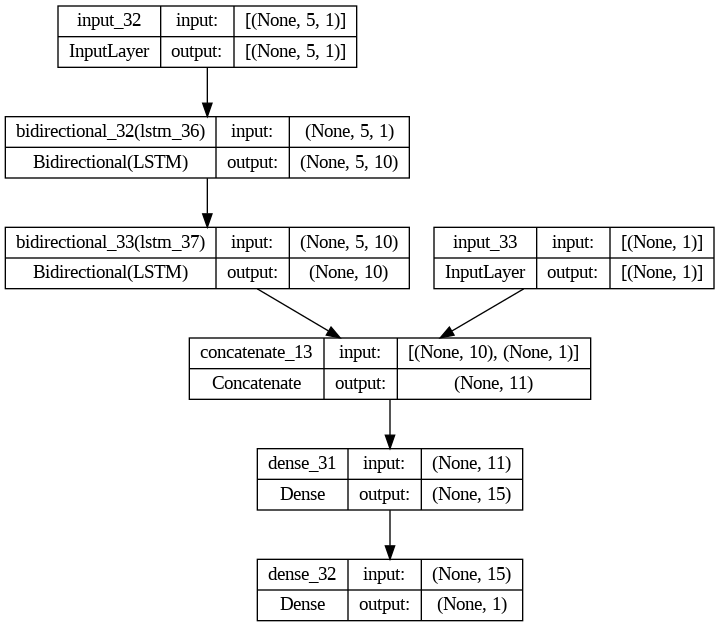

In [181]:
tf.keras.utils.plot_model(model, to_file='model_plt.png', show_shapes=True)

In [182]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [183]:
history = model.fit(x=[X_train_c, X_train_s], y=y_train, epochs=150, batch_size=64)

Epoch 1/150
4/4 [==============================] - 8s 23ms/step - loss: 0.7024 - accuracy: 0.4860
Epoch 2/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6848 - accuracy: 0.5607
Epoch 3/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6821 - accuracy: 0.5607
Epoch 4/150
4/4 [==============================] - 0s 24ms/step - loss: 0.6865 - accuracy: 0.5421
Epoch 5/150
4/4 [==============================] - 0s 19ms/step - loss: 0.6821 - accuracy: 0.5748
Epoch 6/150
4/4 [==============================] - 0s 19ms/step - loss: 0.6801 - accuracy: 0.5607
Epoch 7/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6774 - accuracy: 0.5748
Epoch 8/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6746 - accuracy: 0.5841
Epoch 9/150
4/4 [==============================] - 0s 21ms/step - loss: 0.6732 - accuracy: 0.5888
Epoch 10/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6722 - accuracy: 0.5748
Epoch 11/150
4/4 [=

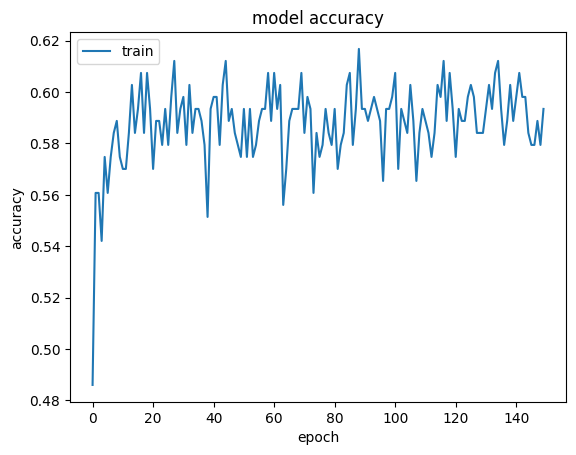

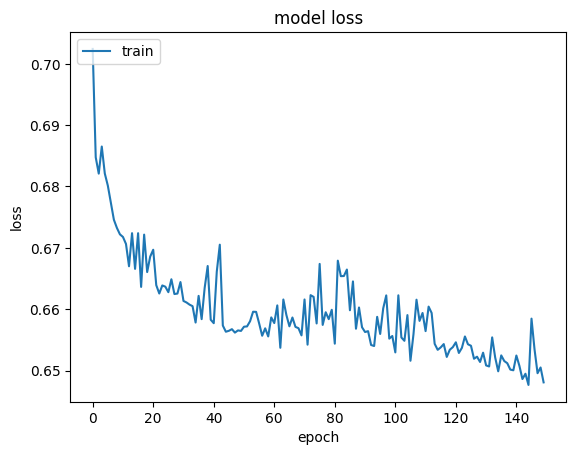

In [184]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [185]:
y_pred = (model.predict(x=[X_test_c,X_test_s]) > 0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


1/1 [==============================] - 2s 2s/step


0.7

In [186]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        18
           1       0.60      0.75      0.67        12

    accuracy                           0.70        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.72      0.70      0.70        30



[[12  3]
 [ 6  9]]


Text(0.5, 1.0, 'Confusion Matrix: NN')

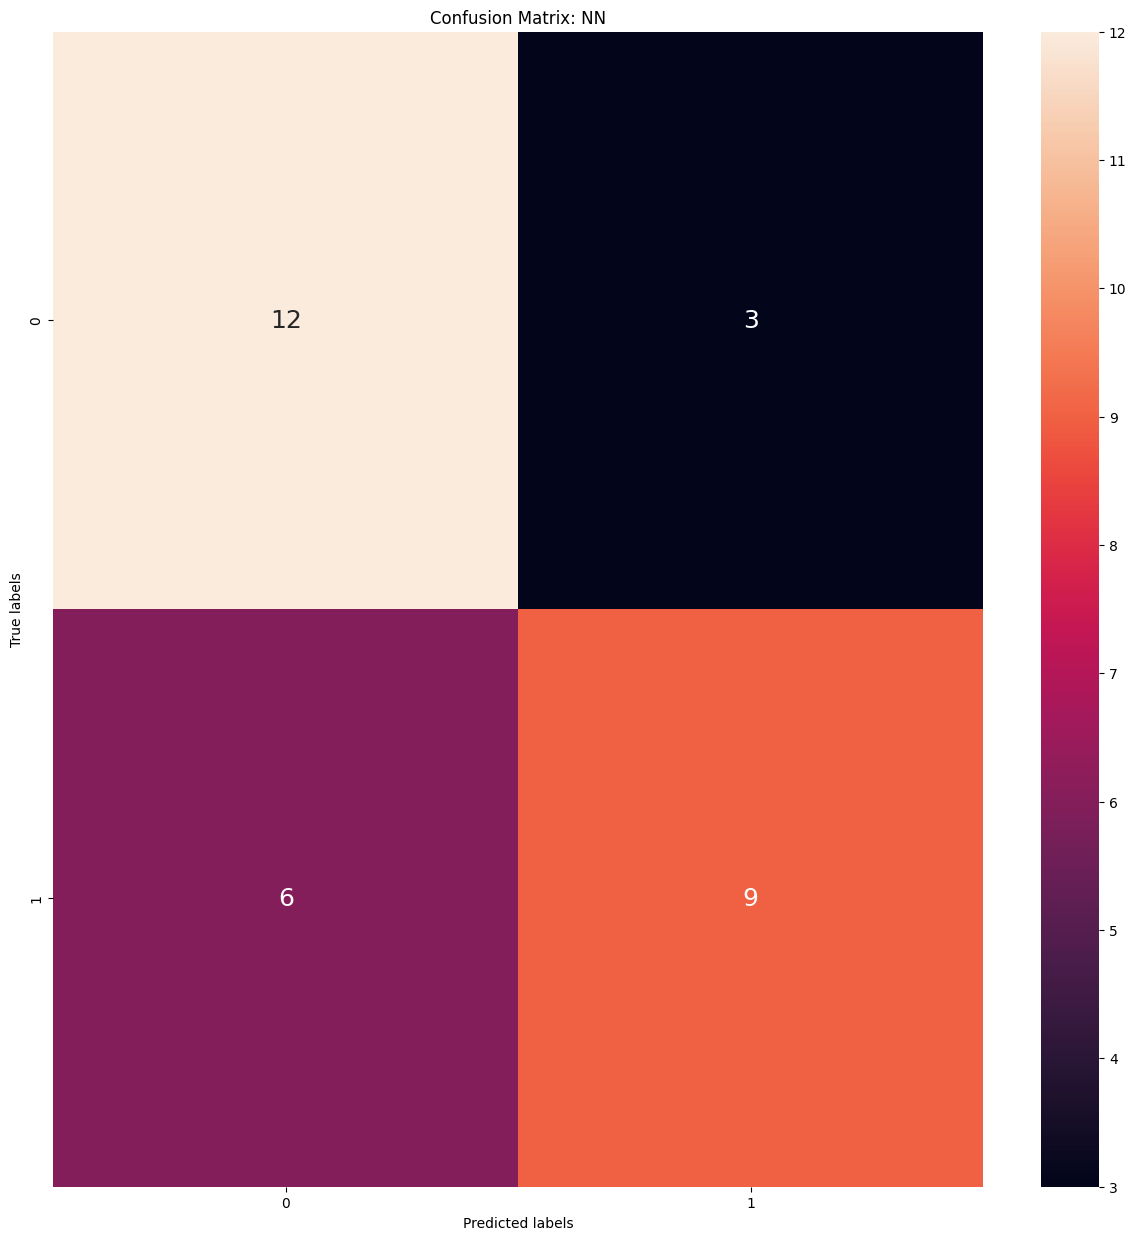

In [187]:
from sklearn.metrics import confusion_matrix

CNN_CM=confusion_matrix(y_pred, y_test)
print(CNN_CM)

#########################################
## Pretty Confusion Matrix........................
#######################################
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(CNN_CM, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
#annot=True to annotate cells, ftm='g' to disable scientific notation
# annot_kws si size  of font in heatmap
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: NN')
# ax.xaxis.set_ticklabels(list(set(y_test)),rotation=90, fontsize = 18)
# ax.yaxis.set_ticklabels(list(set(y_test)),rotation=0, fontsize = 18)

# Only previous 5 days price

In [188]:
from sklearn.preprocessing import MinMaxScaler

xc = df[['Close']]
xs = df[['sentiment']]
y = df[['StockMovement']]

scaler = MinMaxScaler()
scaled_xc = scaler.fit_transform(xc)

In [189]:
# Function to create sequences for LSTM

seq_length = 5

def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        X.append(seq)
    return np.array(X)

In [190]:
x = create_sequences(scaled_xc,seq_length)

In [191]:
def create_y(data, seq):
  return data[seq:]

In [192]:
y = create_y(y,seq_length)
y.shape

(244, 1)

In [193]:
X_train_c = x[:-30]
X_test_c = x[-30:]

# Reshape the data for LSTM (samples, time steps, features)
X_train_c = X_train_c.reshape(X_train_c.shape[0], seq_length, 1)
X_test_c = X_test_c.reshape(X_test_c.shape[0], seq_length, 1)

y_train = y[:-30]
y_test = y[-30:]

In [198]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([])
model.add(tf.keras.layers.Input(shape=(seq_length,1)))
model.add(Bidirectional(tf.keras.layers.LSTM(seq_length, return_sequences=True)))
model.add(Bidirectional(tf.keras.layers.LSTM(seq_length)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [199]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_36 (Bidirect  (None, 5, 10)             280       
 ional)                                                          
                                                                 
 bidirectional_37 (Bidirect  (None, 10)                640       
 ional)                                                          
                                                                 
 dense_34 (Dense)            (None, 1)                 11        
                                                                 
Total params: 931 (3.64 KB)
Trainable params: 931 (3.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [200]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate = 0.01), loss='binary_crossentropy',metrics=['accuracy'])

In [201]:
history = model.fit(X_train_c, y_train, epochs=150, batch_size=64)

Epoch 1/150
4/4 [==============================] - 9s 12ms/step - loss: 0.6928 - accuracy: 0.4953
Epoch 2/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6894 - accuracy: 0.5514
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6902 - accuracy: 0.5280
Epoch 4/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6876 - accuracy: 0.5467
Epoch 5/150
4/4 [==============================] - 0s 13ms/step - loss: 0.6843 - accuracy: 0.5607
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6838 - accuracy: 0.5561
Epoch 7/150
4/4 [==============================] - 0s 11ms/step - loss: 0.6856 - accuracy: 0.5421
Epoch 8/150
4/4 [==============================] - 0s 11ms/step - loss: 0.6818 - accuracy: 0.5701
Epoch 9/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6826 - accuracy: 0.5561
Epoch 10/150
4/4 [==============================] - 0s 12ms/step - loss: 0.6823 - accuracy: 0.5561
Epoch 11/150
4/4 [=

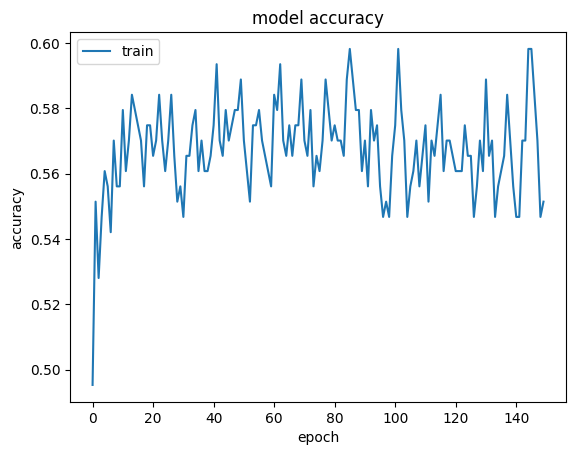

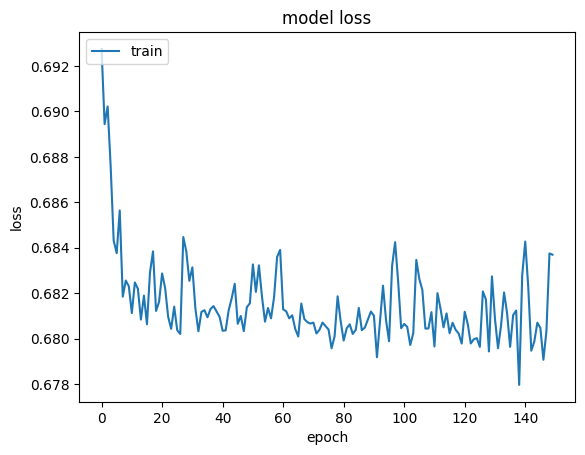

In [202]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [203]:
y_pred = (model.predict(x=X_test_c) > 0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


1/1 [==============================] - 2s 2s/step


0.5

In [204]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.28      0.40        18
           1       0.43      0.83      0.57        12

    accuracy                           0.50        30
   macro avg       0.57      0.56      0.49        30
weighted avg       0.60      0.50      0.47        30



[[ 5  2]
 [13 10]]


Text(0.5, 1.0, 'Confusion Matrix: NN')

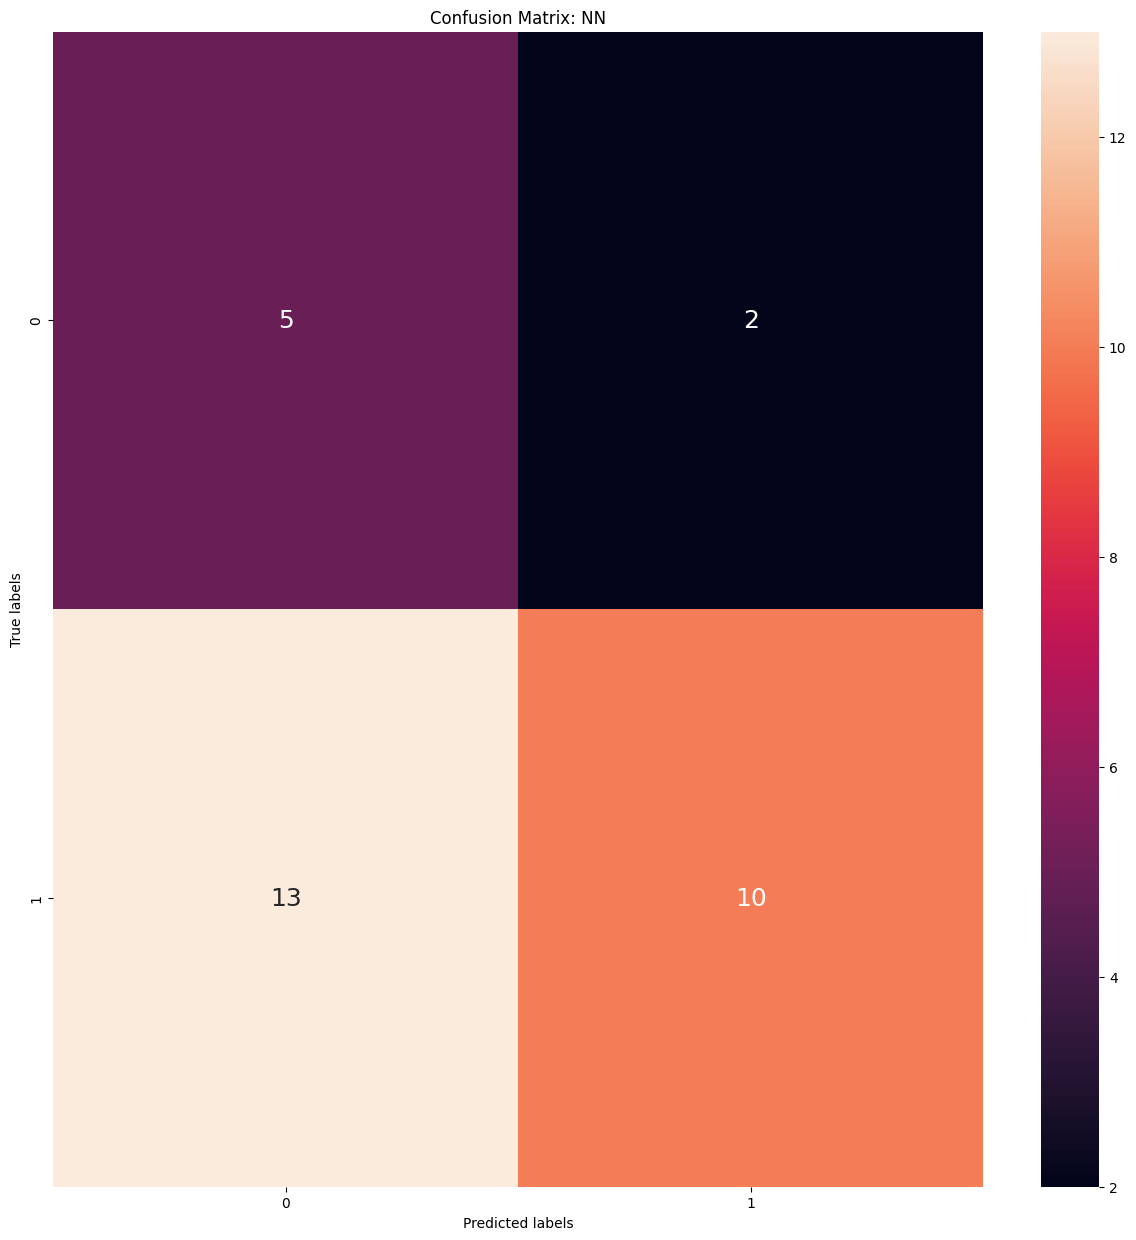

In [205]:
from sklearn.metrics import confusion_matrix

CNN_CM=confusion_matrix(y_pred, y_test)
print(CNN_CM)

#########################################
## Pretty Confusion Matrix........................
#######################################
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(CNN_CM, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
#annot=True to annotate cells, ftm='g' to disable scientific notation
# annot_kws si size  of font in heatmap
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: NN')
# ax.xaxis.set_ticklabels(list(set(y_test)),rotation=90, fontsize = 18)
# ax.yaxis.set_ticklabels(list(set(y_test)),rotation=0, fontsize = 18)